## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt



In [2]:
# Connect to the database
conn = sqlite3.connect('ZippedData/im.db')
cursor = conn.cursor()

In [3]:
# Read the movie gross data into a pandas dataframe
df = pd.read_csv('ZippedData/bom.movie_gross.csv.gz')

In [4]:
# Preview the data
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# Check the data types of each column
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [6]:
# Check for missing values in each column
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Remove rows with missing values in the 'studio' column
df = df.dropna(subset=['studio'])

In [9]:
# check the percentage of missing values in the "foreign_gross" column like this:
foreign_gross_missing = df['foreign_gross'].isnull().sum()
total_rows = df.shape[0]
percentage_missing = (foreign_gross_missing / total_rows) * 100
print(f"The percentage of missing values in the 'foreign_gross' column is: {percentage_missing:.2f}%")

The percentage of missing values in the 'foreign_gross' column is: 39.89%


In [10]:
# Fill missing values in the 'domestic_gross' column with the median value
median_domestic_gross = df['domestic_gross'].median()
df['domestic_gross'] = df['domestic_gross'].fillna(median_domestic_gross)

In [11]:
# Convert foreign_gross column to numeric datatype
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Fill missing values in the foreign_gross column with 0
df['foreign_gross'] = df['foreign_gross'].fillna(0)

# Create a new column called total_gross which is the sum of domestic_gross and foreign_gross columns
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
df


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [12]:
# Read the movie basics data from the database into a pandas dataframe
movie_basics_df = pd.read_sql('SELECT * FROM movie_basics', conn)

In [13]:
# Preview the data
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
# Read the movie ratings data from the database into a pandas dataframe
movie_ratings_df = pd.read_sql('SELECT * FROM movie_ratings', conn)

In [15]:
# Preview the data
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
# Check for missing values in each dataframe
print(df.isnull().sum())
print(movie_ratings_df.isnull().sum())
print(movie_basics_df.isnull().sum())


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [17]:
# Check for duplicate rows in each dataframe
print(movie_basics_df.duplicated().sum())
print(movie_ratings_df.duplicated().sum())

0
0


In [20]:
# Read the tmdb movies data into a pandas dataframe
tmdb_movies= pd.read_csv("ZippedData/tmdb.movies.csv.gz")

In [21]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
# Read the movie info data from a TSV file into a pandas dataframe
file_path = "ZippedData/rt.movie_info.tsv.gz"
movie_info_df = pd.read_csv(file_path, delimiter='\t', encoding='unicode_escape')


In [24]:
# Preview the data
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [25]:
# Check for missing values in each column
print(movie_info_df.isnull().sum())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [26]:
# Fill missing values with the mode (most common value) of the column
mode_rating = movie_info_df["rating"].mode()[0]
mode_genre = movie_info_df["genre"].mode()[0]
mode_runtime = movie_info_df["runtime"].mode()[0]


movie_info_df["rating"].fillna(mode_rating, inplace=True)
movie_info_df["genre"].fillna(mode_genre, inplace=True)
movie_info_df["runtime"].fillna(mode_runtime, inplace=True)

In [28]:
tmdb_movies_df = pd.read_csv("ZippedData/tmdb.movies.csv.gz")
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
print(tmdb_movies_df.isnull().sum())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [31]:
# Replace the file path with the actual file path on your system
file_path = "ZippedData/rt.movie_info.tsv.gz"

# Use read_csv to read the file as a DataFrame
movie_info_df = pd.read_csv(file_path, delimiter='\t', encoding='unicode_escape')

movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [32]:
#replace the missing values with a string that indicates the value is missing, such as "Unknown".

movie_info_df["director"].fillna("Unknown", inplace=True)
movie_info_df["writer"].fillna("Unknown", inplace=True)
movie_info_df["theater_date"].fillna("Unknown", inplace=True)
movie_info_df["dvd_date"].fillna("Unknown", inplace=True)
movie_info_df["currency"].fillna("Unknown", inplace=True)
movie_info_df["studio"].fillna("Unknown", inplace=True)


In [33]:
#Check percentage of missing values in box office
total_rows = len(movie_info_df)
missing_box_office = movie_info_df["box_office"].isnull().sum()
percent_missing_box_office = (missing_box_office / total_rows) * 100
print("Percentage of missing values in box_office column: {:.2f}%".format(percent_missing_box_office))

Percentage of missing values in box_office column: 78.21%


In [34]:
#Drop the box office column
movie_info_df.drop('box_office', axis=1, inplace=True)

In [ ]:
#Preview the data
movie_info_df.head()

In [36]:
# Use read_csv to read the file as a DataFrame
reviews_df = pd.read_csv('ZippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')

In [37]:
#Preview the data
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [38]:
#Check for missing values in review_df
print(reviews_df.isnull().sum())

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


In [39]:
# Drop rows with missing 'review' values
reviews_df.dropna(subset=['review'], inplace=True)

# Convert 'rating' to float and impute missing values with median
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
rating_median = reviews_df['rating'].median()
reviews_df['rating'].fillna(rating_median, inplace=True)

# Drop rows with missing 'publisher' values
reviews_df.dropna(subset=['publisher'], inplace=True)

# Convert 'date' to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# Check for missing values again
print(reviews_df.isnull().sum())

id               0
review           0
rating           0
fresh            0
critic        1898
top_critic       0
publisher        0
date             0
dtype: int64


In [40]:
#Drop the critic column
cleaned_reviews_df = reviews_df.dropna(subset=['critic'])


In [41]:
# Check for missing values again
print(cleaned_reviews_df.isnull().sum())

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64


In [42]:
cleaned_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,6.0,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
1,3,It's an allegory in search of a meaning that n...,6.0,rotten,Annalee Newitz,0,io9.com,2018-05-23
2,3,... life lived in a bubble in financial dealin...,6.0,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04
3,3,Continuing along a line introduced in last yea...,6.0,fresh,Daniel Kasman,0,MUBI,2017-11-16
5,3,... Cronenberg's Cosmopolis expresses somethin...,6.0,fresh,Michelle Orange,0,Capital New York,2017-09-11


Top 10 studios by total gross revenue:
          total_gross  title
studio                      
BV       4.421288e+10    106
Fox      3.100537e+10    136
WB       3.083595e+10    140
Uni.     2.975716e+10    147
Sony     2.240644e+10    110
Par.     1.954926e+10    101
WB (NL)  1.033470e+10     45
LGF      8.602983e+09    103
LG/S     5.431924e+09     41
P/DW     5.076500e+09     10


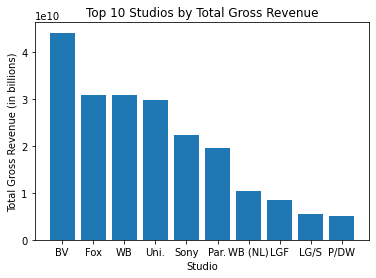

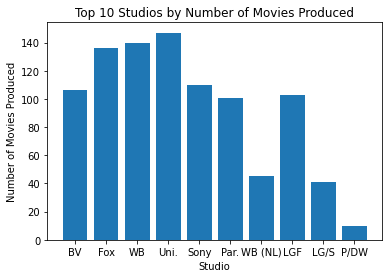

In [43]:
# Group the data by studio and compute statistics
studio_stats = df.groupby('studio').agg({'total_gross': 'sum', 'title': 'count'}).sort_values('total_gross', ascending=False)

# Print the top 10 studios by total gross revenue
print("Top 10 studios by total gross revenue:")
print(studio_stats.head(10))

# Plot a bar chart of the top 10 studios by total gross revenue
plt.bar(studio_stats.head(10).index, studio_stats.head(10)['total_gross'])
plt.title('Top 10 Studios by Total Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Total Gross Revenue (in billions)')
plt.show()

# Plot a bar chart of the top 10 studios by number of movies produced
plt.bar(studio_stats.head(10).index, studio_stats.head(10)['title'])
plt.title('Top 10 Studios by Number of Movies Produced')
plt.xlabel('Studio')
plt.ylabel('Number of Movies Produced')
plt.show()
